In [3]:
## Put import statements here
import numpy as np
import pandas as pd

# Creating  a Machine Learning model

Today you will be creating your first machine learning model! There are many components to this creating these models. However, there is a general pipeline that you can follow and iterate over to simplify the model building process.

  1. Define the problem
  2. Prepare the data
  3. Spot check algorithms (to figure out the best ones)
  4. Improve results (usually requires going back to step 2 or 3)
  5. Present results
  
For a more detailed description of the results, visit <a href=http://machinelearningmastery.com/process-for-working-through-machine-learning-problems/>this website.</a>

Since we have been using the iris dataset a lot lately, we felt it was time to switch things up. Let's look at this dataset. It can be downloaded directly from the UCI Machine Learning repository. <a href = http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION>Download the dataset here.</a> Once you have downloaded it, make sure the dataset is in the same folder as this ipython notebook. From there, we can begin working with it. 

## 1. Define the problem

To understand where this dataset might be useful, skim over these articles. They both show how machine learning can improve graduation rates by finding students at risk of dropping out. In this lab, we are going to take characteristics and grades for a group of students and see if we can predict whether they fall in low, medium, or high risk categories.

https://dssg.uchicago.edu/wp-content/uploads/2016/04/montogmery-kd2015.pdf

http://www.opb.org/news/article/npr-how-one-university-used-big-data-to-boost-graduation-rates/

Question 1: From the second article, by what percentage have graduation rates increased at Georgia State University since they implemented their new graduation and progression success (GPS) system and hired new advisors? 

6%

## 2. Prepare the data

Skim over the student.txt file to better understand what is in this dataset. It is important to know where to find information about any of the variables in a dataset. We are just going to use student-por.csv for this labn. It contains data on the grades and characteristics of certain students in the class. Let's load the data.

In [4]:
student_grades = pd.read_csv('student-por.csv', ';')
student_grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Make sure you check the dataframe using .head(). Is there something wrong? What can you do to fix this error? 

Yes, all the features are in one column.

In [5]:
# student_grades.split(";") - put delimiter in read_csv statement.

We are going to attempt to predict the final grade (G3 column). However, the scores range from 0 - 20. Thus, we will need to bin the values. Let's assume that we want our algorithm to flag anyone who may possibly score below a 10 on the final grade, to allow the teacher time to tutor or help the student boost their score. 

Run this cell to create a variable that will flag a student with a score less than 10 with a 1, and all other students will be 0.

In [6]:
def categorize(val,high_risk):
    if val <= high_risk:
        return 1
    else:
        return 0
    
student_grades.loc[:,'flag_student'] = student_grades.loc[:,'G3'].map(lambda x: categorize(x,10))

'flag_students' will now be the column we are trying to predict. This is where your expertise kicks in! Choose which features to keep, and save them into the X variable (this will become our feature space). 

In [7]:
student_grades.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,flag_student
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,1
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,0


In [8]:
X = student_grades.loc[:,['Mjob', 'romantic','sex', 'goout', 'Walc']]
y = student_grades.loc[:,'flag_student']

In [9]:
X.tail()

,Mjob,romantic,sex,goout,Walc
644,services,no,F,2,2
645,teacher,no,F,4,1
646,other,no,F,1,1
647,services,no,M,5,4
648,services,no,M,1,4


In [10]:
#convert categorical to dummy
student_with_dummies = pd.get_dummies(student_grades)

In [11]:
dummies = pd.get_dummies(X)
dummies.tail()

,goout,Walc,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,romantic_no,romantic_yes,sex_F,sex_M
644,2,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
645,4,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
646,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
647,5,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
648,1,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Bonus: Since KNN relies on distance, you cannot directly put categorical variables into the algorithm. If you want to include this type of information, you will first need to dummify the variables before putting them in the classifier. As an example, dummifying would take a column with 'yes' or 'no' and would change the 'yes' to a 1 and a 'no' to a zero. Try creating a method that will do this for you. 

Use pd.get_dummies(X)

# 3. Spot check algorithms

For now, we will use accuracy to improve upon our model. We want to maximize the accuracy in both the training and testing set. Play around and see how high you can get the scores! Watch out though, scores that are too high (such as 100% accuracy) can sometimes be flags for leakage and other improper modeling techniques. While using PCA or LDA, make sure to use the following pipeline. 

 1. Train/Test split
 2. Dimensionality reduction on training set
 3. Fit model to training set
 4. Accuracy of model on training set
 5. Dimensionality reduction on testing set
 6. Accuracy of model on testing set

Use LDA, PCA, and KNN to make a classifier to predict using attributes that suggest a student may be at high risk for under-performing in the course. Note: LDA can be used for dimensionality reduction and classification. 

In [12]:
# LDA - linear discriminant analysis; ## LDA as a Classifier using Sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Create an instance of the class
lda = LinearDiscriminantAnalysis(n_components = 2)

In [14]:
# Run a train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [15]:
import statsmodels.formula.api as smf
lm = smf.logit('flag_student ~ school + 	sex + 	age + 	address + 	famsize + 	Pstatus + 	Medu + 	Fedu + 	Mjob + 	Fjob + 	reason + 	guardian + 	traveltime + 	studytime + 	failures + 	schoolsup + 	famsup + 	paid + 	activities + 	nursery + 	higher + 	internet + 	romantic + 	famrel + 	freetime + 	goout + 	Dalc + 	Walc + 	health + 	absences', data = student_grades).fit()
lm.summary2()

Optimization terminated successfully.
         Current function value: 0.404196
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.342     
Dependent Variable:  flag_student      AIC:               604.6461  
Date:                2016-11-06 15:01  BIC:               783.6634  
No. Observations:    649               Log-Likelihood:    -262.32   
Df Model:            39                LL-Null:           -398.38   
Df Residuals:        609               LLR p-value:       1.0115e-36
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.0250   2.0704 -0.4951 0.6205 -5.0828  3.0328
school[T.MS]          1.4398   0.2715  5.3033 0.0000  0.9077  1.9719
sex[T.M]              0.7177   0.2723  2.6357 0.0084  0.1840  1.2514
address[T.U]         -0.1603   0.2626 -0.6105 0.5416 -0.6750  0.3544
famsize[T.LE3]       -0.0772   0.2589 -0.2982 0.7655 -0.5846  0.4302
Pstatus[T.T]         -0.0157   0.3553 -0.0443 0.9647 -0.7120  0.6806
Mjob[T.health]       -0.0040   0.5606 -0.0071 0.9943 -1.1028  1.0948
Mjob[T.other]        -0.0217   0.2993 -0.0725 0.9422 -0.6083  0.5649
Mjob[T.services]     -0.3163   0.3868 -0.8179 0.4134 -1.0744  0.4417
Mjob[T.teacher]      -0.6812   0.5674 -1.2004 0.2300 -1.7933  0.4310
Fjob[T.health]        1.4440   0.7344  1.9663 0.0493  0.0046  2.8834
Fjob[T.other]        -0.0249   0.4556 -0.0547 0.9563 -0.9179  0.8680
Fjob[T.services]      0.5767   0.4799  1.2017 0.2295 -0.3639  1.5173
Fjob[T.teacher]      -0.4342   0.8643 -0.5024 0.6154 -2.1282  1.2597
reason[T.home]       -0.6103   0.3063 -1.9922 0.0463 -1.2107 -0.0099
reason[T.other]      -0.4530   0.3705 -1.2228 0.2214 -1.1791  0.2731
reason[T.reputation] -0.4504   0.3254 -1.3843 0.1663 -1.0882  0.1873
guardian[T.mother]    0.7853   0.2893  2.7141 0.0066  0.2182  1.3524
guardian[T.other]    -0.5233   0.6179 -0.8469 0.3971 -1.7344  0.6878
schoolsup[T.yes]      1.2151   0.3635  3.3426 0.0008  0.5026  1.9276
famsup[T.yes]         0.0759   0.2398  0.3167 0.7515 -0.3941  0.5460
paid[T.yes]          -0.1317   0.4765 -0.2764 0.7822 -1.0657  0.8023
activities[T.yes]    -0.2678   0.2394 -1.1186 0.2633 -0.7371  0.2015
nursery[T.yes]        0.2456   0.2930  0.8385 0.4018 -0.3286  0.8198
higher[T.yes]        -1.5109   0.3729 -4.0518 0.0001 -2.2418 -0.7800
internet[T.yes]       0.0518   0.2799  0.1850 0.8532 -0.4967  0.6003
romantic[T.yes]       0.3869   0.2405  1.6091 0.1076 -0.0844  0.8582
age                  -0.0179   0.1098 -0.1634 0.8702 -0.2331  0.1972
Medu                 -0.0017   0.1542 -0.0110 0.9912 -0.3039  0.3005
Fedu                 -0.2788   0.1442 -1.9335 0.0532 -0.5615  0.0038
traveltime           -0.0615   0.1586 -0.3876 0.6983 -0.3724  0.2494
studytime            -0.1735   0.1500 -1.1565 0.2475 -0.4675  0.1205
failures              1.7351   0.2968  5.8457 0.0000  1.1533  2.3168
famrel               -0.0222   0.1170 -0.1897 0.8495 -0.2514  0.2070
freetime              0.1538   0.1167  1.3177 0.1876 -0.0750  0.3825
goout                -0.0543   0.1150 -0.4725 0.6366 -0.2797  0.1711
Dalc                  0.0680   0.1609  0.4223 0.6728 -0.2474  0.3833
Walc                  0.0570   0.1277  0.4461 0.6556 -0.1933  0.3073
health                0.0385   0.0832  0.4632 0.6432 -0.1245  0.2016
absences              0.0924   0.0245  3.7759 0.0002  0.0444  0.1403
====================================================================

"""

In [16]:
#export data to csv
dummies.to_csv('student_with_dummies.csv')

In [17]:
#1 Split data into train/test
#code from http://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
X=student_with_dummies.drop(['flag_student','G1','G2'],axis = 1)
X_scaled = (X-np.mean(X, axis = 0))/(np.var(X, axis =0))
Y=student_with_dummies.flag_student
msk = np.random.rand(len(student_with_dummies)) < 0.8
train_X,train_Y = X_scaled[msk],Y[msk]
test_X, test_Y = X_scaled[~msk],Y[~msk]
len(test_Y),len(train_Y)

(125, 524)

In [18]:
#2 dimensionality reduction on training set - PCA:

from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(train_X)
pca.explained_variance_ratio_,np.cumsum(pca.explained_variance_ratio_)

(array([  1.02895152e-01,   9.55673213e-02,   7.77932593e-02,
          6.23924307e-02,   5.73999567e-02,   5.60633104e-02,
          5.07108028e-02,   4.41578225e-02,   4.23906337e-02,
          3.87409199e-02,   3.50089066e-02,   2.88047096e-02,
          2.80717971e-02,   2.65253716e-02,   2.54439195e-02,
          2.36536398e-02,   2.29568907e-02,   2.19176653e-02,
          1.99178220e-02,   1.90217979e-02,   1.85224041e-02,
          1.67584046e-02,   1.62534647e-02,   1.43819934e-02,
          1.29684577e-02,   1.22914792e-02,   6.40466131e-03,
          4.06780621e-03,   3.71231280e-03,   3.14328872e-03,
          2.91720128e-03,   2.03471281e-03,   1.83550180e-03,
          1.44079247e-03,   1.23536433e-03,   1.15308630e-03,
          6.34371210e-04,   5.50092161e-04,   1.53877790e-04,
          1.06598262e-04,   2.02924906e-32,   3.33549389e-33,
          2.92258367e-33,   1.52088728e-33,   1.15680581e-33,
          7.44897868e-34,   6.44938295e-34,   6.44938295e-34,
        

The first 20 principal components account for 90% of the variation in the data. The 21st principal component contributes less than 1% of the variability. Use only the first 20 principal components

Populating the interactive namespace from numpy and matplotlib


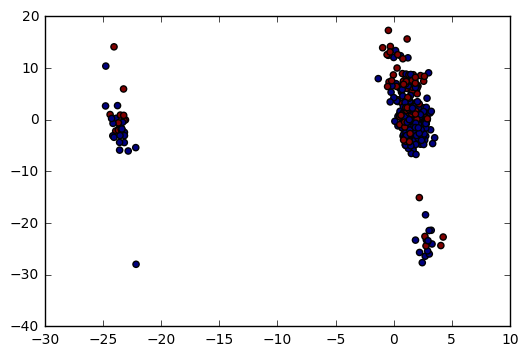

In [19]:
%pylab inline

pca = decomposition.PCA(n_components = 20)
pca.fit(train_X)
X_PCA = pca.transform(train_X)
plt.scatter(X_PCA[:,0],X_PCA[:,1], c =train_Y);

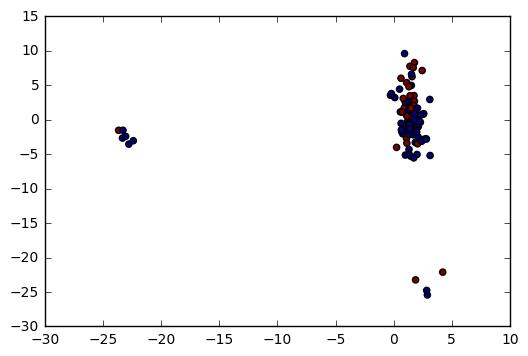

In [20]:
#PCA on test data
X_test_PCA = pca.transform(test_X)
plt.scatter(X_test_PCA[:,0],X_test_PCA[:,1], c =test_Y);

In [21]:
#KNN after PCA
from sklearn.neighbors import KNeighborsClassifier

#search for optimal neighbors
nbrs = KNeighborsClassifier(n_neighbors=3).fit(X_PCA, train_Y)
#nbrs.predict(X_train_PCA)
nbrs.score(X_test_PCA,test_Y)

0.68799999999999994

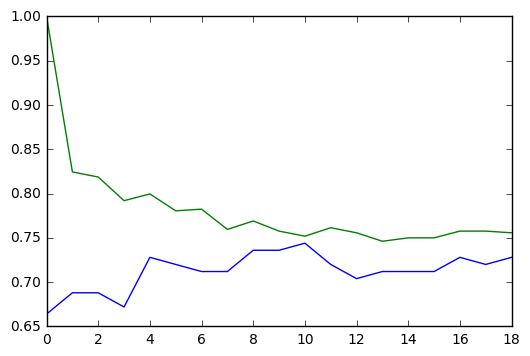

In [22]:
error_test,error_train =[],[]
for i in range(1,20):
    nbrs = KNeighborsClassifier(n_neighbors=i).fit(X_PCA, train_Y)
    error_test.append(nbrs.score(X_test_PCA,test_Y))
    error_train.append(nbrs.score(X_PCA,train_Y))
plt.plot(error_test, label = "test")
plt.plot(error_train, label = 'train')
plt.show()

Errors minimized at neighbors = 13

Accuracy: 70.4


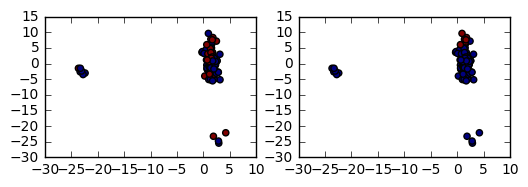

In [23]:
nbrs = KNeighborsClassifier(n_neighbors=13).fit(X_PCA, train_Y)
#nbrs.predict(X_test_PCA)
#nbrs.score(X_test_PCA,test_Y)
print("Accuracy:", nbrs.score(X_test_PCA,test_Y)*100)
plt.subplot(221)
plt.scatter(X_test_PCA[:,0],X_test_PCA[:,1], c =test_Y);
plt.subplot(222)

plt.scatter(X_test_PCA[:,0],X_test_PCA[:,1], c =nbrs.predict(X_test_PCA));
#plt.scatter(X_test_PCA[:,0],X_test_PCA[:,1], c= train_Y)
#plt.plot(X_test_PCA[:,0],X_test_PCA[:,1],'o', color = nbrs.predict(X_test_PCA))
plt.figure(figsize(15,10))
plt.show();

In [24]:
#LDA on data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(train_X, train_Y)
clf.classes_
#print(clf.decision_function(train_X))
print("Accuracy:", clf.score(test_X, test_Y)*100)
# print(clf.explained_variance_ratio)
#print("Covariance",clf.store_covariance)

Accuracy: 88.0


/Users/justin/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# 4. Improve Results

There are a few things we can do to maximize the score. One thing is to tune different parameters. Parameters can be number of components, number of nearest neighbors, which distance function to use, and so on. Change these numbers and see how the accuracy changes with them. 

Bonus: Check out <a href=http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html>GridsearchCV</a>. This will allow you to choose combinations of parameters and it will let you know which one is the best. It is super powerful!

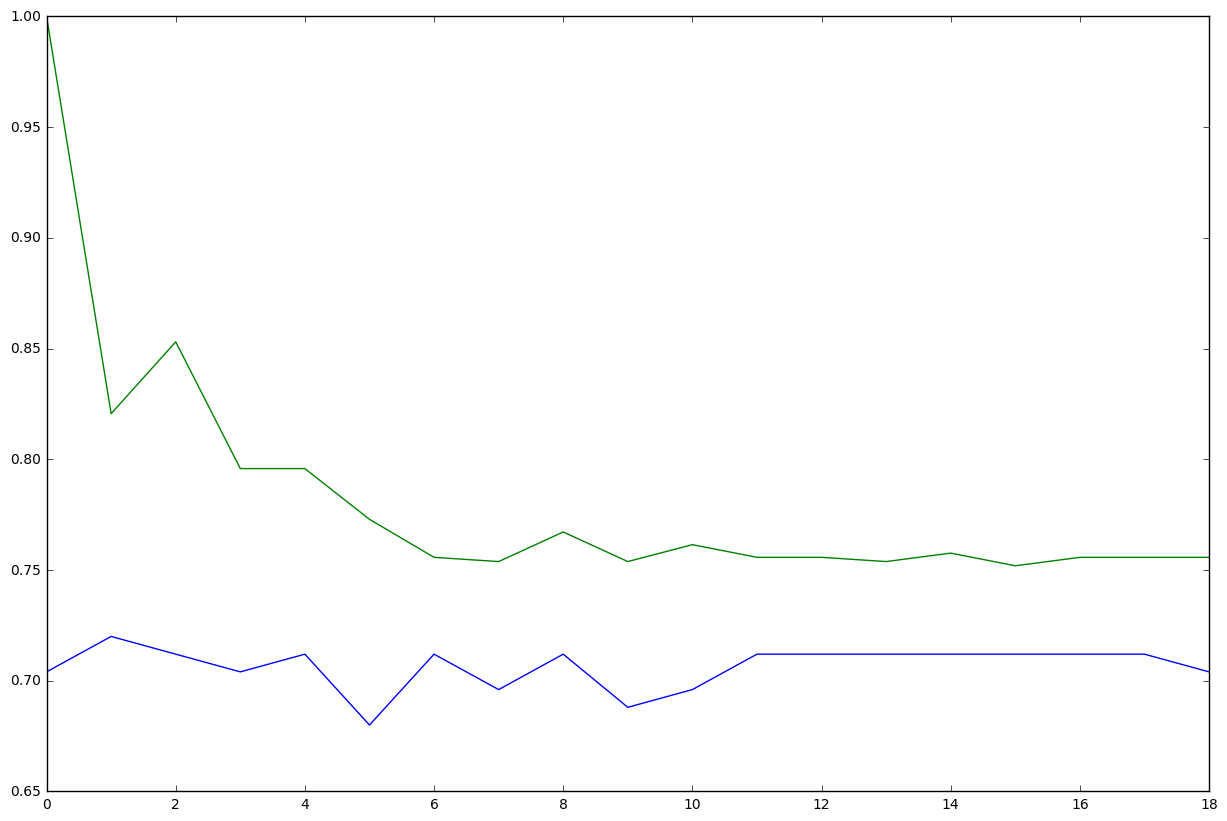

In [25]:
#KNN without PCA:
error_test,error_train =[],[]
for i in range(1,20):
    nbrs = KNeighborsClassifier(n_neighbors=i).fit(train_X, train_Y)
    error_test.append(nbrs.score(test_X,test_Y))
    error_train.append(nbrs.score(train_X,train_Y))
plt.plot(error_test, label = "test")
plt.plot(error_train, label = 'train')
plt.show()

In [26]:
# Without PCA: use 11 neighbors

nbrs = KNeighborsClassifier(n_neighbors=11).fit(train_X, train_Y)
#nbrs.predict(X_test_PCA)
#nbrs.score(X_test_PCA,test_Y)
print("Accuracy:", nbrs.score(test_X,test_Y)*100)



Accuracy: 69.6


There are a few things we can do to maximize the score. One thing is to tune different parameters. Parameters can be number of components, number of nearest neighbors, which distance function to use, and so on. Change these numbers and see how the accuracy changes with them. 

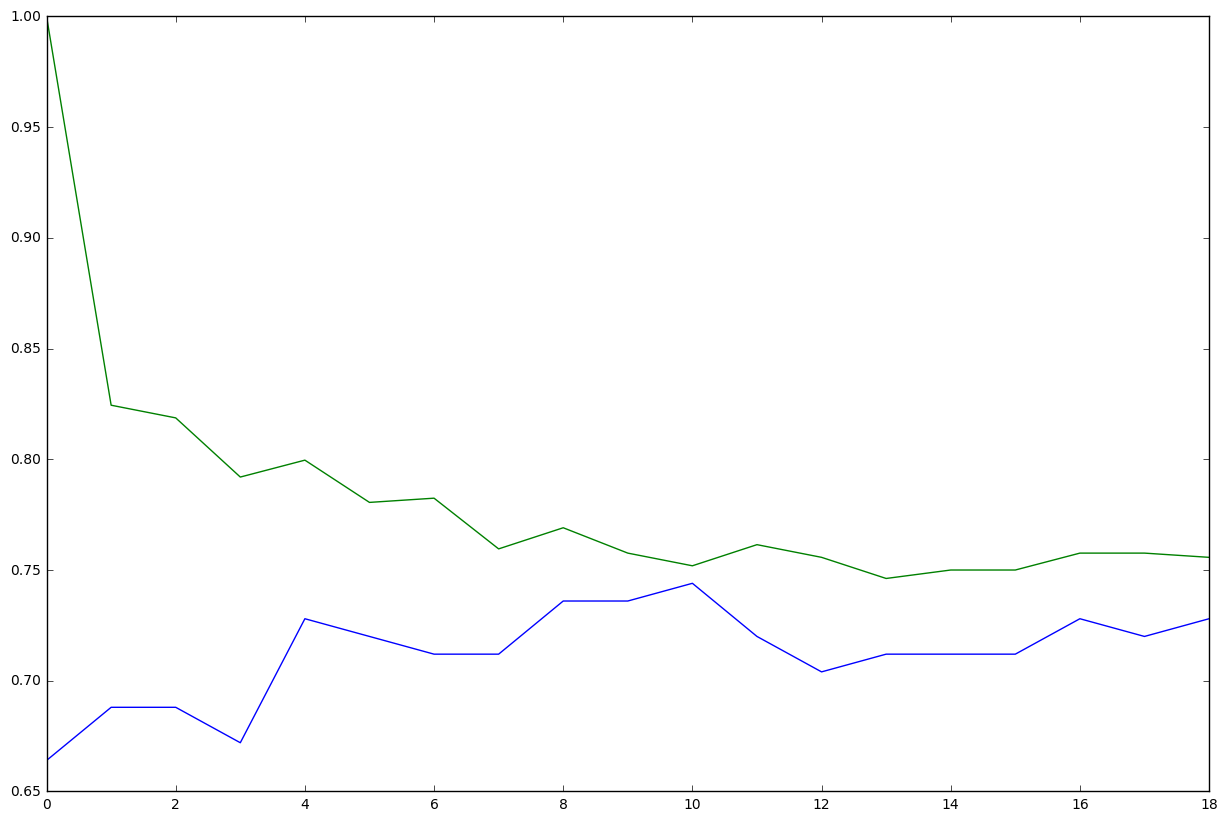

In [27]:
error_test,error_train =[],[]
for i in range(1,20):
    nbrs = KNeighborsClassifier(n_neighbors=i, algorithm = 'kd_tree').fit(X_PCA, train_Y)
    error_test.append(nbrs.score(X_test_PCA,test_Y))
    error_train.append(nbrs.score(X_PCA,train_Y))
plt.plot(error_test, label = "test")
plt.plot(error_train, label = 'train')
plt.show()

In [28]:
nbrs = KNeighborsClassifier(n_neighbors=11, algorithm = 'kd_tree').fit(train_X, train_Y)
#nbrs.predict(X_test_PCA)
#nbrs.score(X_test_PCA,test_Y)
print("Accuracy:", nbrs.score(test_X,test_Y)*100)



Accuracy: 69.6


In [29]:
nbrs = KNeighborsClassifier(n_neighbors=11, algorithm = 'brute').fit(train_X, train_Y)
#nbrs.predict(X_test_PCA)
#nbrs.score(X_test_PCA,test_Y)
print("Accuracy:", nbrs.score(test_X,test_Y)*100)



Accuracy: 69.6


# 5. Present result

For a company, this usually includes a slide show or presentation on what your findings were. In this case, you will not have to do that. Although, you may want to think about these aspects of your model. 

 1. Are there ethical concerns with trying to find high risk students this way?
 
 Yes, it could be argued that you're discriminating people based on sex, race, or family income.
 
 2. Is there a possibility of neglecting the high performing students? What would the implications of this be?
 
 Yes, resources get spent on underperforming students, and quality and reputation of institution decreases.
 
 3. Would it be beneficial to allow a parent to have access to this information so that they can be informed when their student is flagged for possibly being at risk of failing the course? 
 
 No, these are based off things that people have no control over, and not the type of info that should be presented when informing an individual that they need to improve, because they aren't direct reasons why a student is failing.
 
There are no right or wrong answers to these questions, but they are good to think about. You do have to provide a thoughtful reponse to atleast one of these questions. 